63741


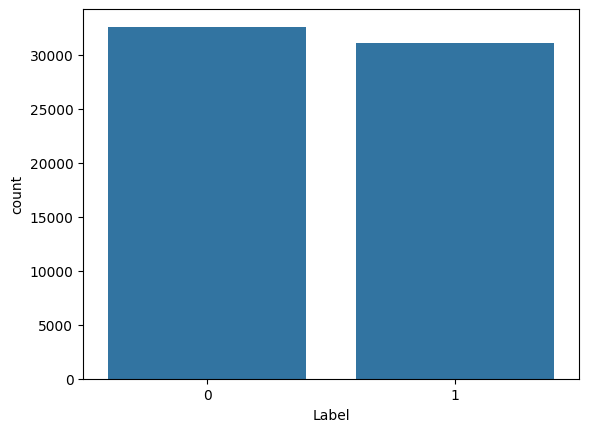

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

# Read the main training dataset
df = pd.read_csv("training_ds1.csv")
df.rename(columns={'label': 'Label', "text": "X"}, inplace=True)

# Read and concatenate additional datasets
df2 = pd.read_csv("train.csv")
df2.rename(columns={'Class': 'Label', "Tweet": "X"}, inplace=True)
df2['Label'] = np.where(df2['Label'] == 'normal', 0, 1)
df = pd.concat([df, df2], ignore_index=True)

df3 = pd.read_csv("test.csv")
df3.rename(columns={'Class': 'Label', "Tweet": "X"}, inplace=True)
df3['Label'] = np.where(df3['Label'] == 'normal', 0, 1)
df = pd.concat([df, df3], ignore_index=True)

train_pos = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv', sep='\t', header=None)
train_neg = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv', sep='\t', header=None)
test_pos = pd.read_csv('test_Arabic_tweets_positive_20190413.tsv', sep='\t', header=None)
test_neg = pd.read_csv('test_Arabic_tweets_negative_20190413.tsv', sep='\t', header=None)

data = pd.concat([train_pos, train_neg, test_pos, test_neg])
data.columns = ['Label', 'X']
data['Label'] = np.where(data['Label'] == 'neg', 1, 0)

df = pd.concat([df, data], ignore_index=True)

# Visualize the distribution of labels
sns.countplot(x="Label", data=df)
print(len(df))


In [4]:
print(df.isnull().sum().sum())

0


In [5]:
print(df.duplicated().sum().sum())  # Number Of Dupliactes Before Delete
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum().sum()) # Number Of Dupliactes After Delete

21011
0


42730


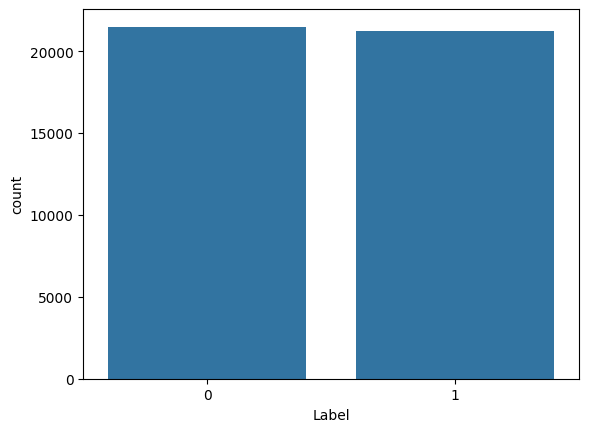

In [6]:


df['X'] = df['X'].astype(str)
df['Label'] = df['Label'].astype(int)
# print(df.head())

sns.countplot(x="Label",data=df)
print(len(df))

In [8]:
import regex as re
df['X'] = df['X'].apply(lambda x: re.sub(r'http\S+', '', x)) # remove URLs
df['X'] = df['X'].apply(lambda x: re.sub(r'@\S+', '', x)) # remove mentions
df['X'] = df['X'].apply(lambda x: re.sub(r'#\S+', '', x)) # remove hashtags
print(df.head())

                                                   X  Label
0  مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...      0
1  كلنا بره ومش هنبطل نزايد على العجايز الي جابون...      1
2          بدل ما انت قاعد بره كده تعالي ازرع الصحرا      0
3      قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان      1
4  وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...      1


In [9]:
df['Label'].value_counts()

Label
0    21497
1    21233
Name: count, dtype: int64

In [10]:
print(df.loc[df ['Label'] == 0])

                                                       X  Label
0      مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...      0
2              بدل ما انت قاعد بره كده تعالي ازرع الصحرا      0
8                                                انت قمر      0
9      كلنا بره ومش هنبطل نزايد على العجايز الي جابون...      0
10        أو اكتشف إن النضال مش سهل وفيه تهديدات وابتزاز      0
...                                                  ...    ...
57960                           بكرة تشوفينه مع الهلال 😂      0
57961                             صباح الخير يا قطر 😂 ..      0
57965                                         دقله هذي 😂      0
57967                                         مشية فرس 💞      0
57968  ربي اغفر لي و لوالدي و لأحبتي و للمؤمنين و الم...      0

[21497 rows x 2 columns]


In [12]:
import nltk
nltk.download("wordnet" , "/nltk_data")

c:\Users\ibrah\Documents\New folder\myenv\Scripts\python.exe: No module named spacy
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from os import listdir
print(listdir("nltk_data"))
print()
print(listdir("nltk_data/corpora"))

['corpora']

[]


42730


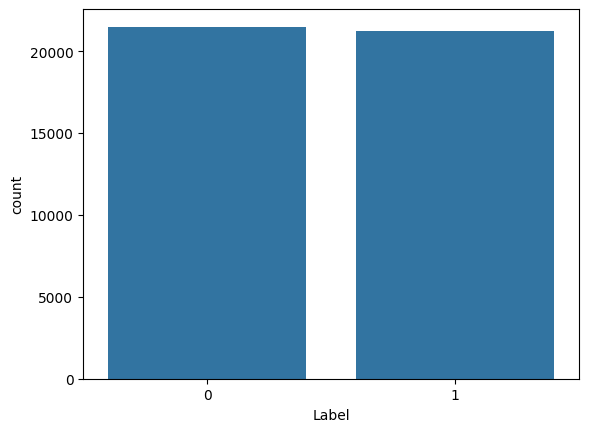

In [16]:
sns.countplot(x="Label",data=df)
print(len(df))

In [18]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(nltk.corpus.stopwords.words("arabic"))


In [21]:
import nltk
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
import string
st = ISRIStemmer()
tokenizer = TweetTokenizer()
stop_words = set(nltk.corpus.stopwords.words("arabic"))


df['tokenized_text'] = df['X'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])





df['stemmed_text'] = df['filtered_text'].apply(lambda x: [st.stem(word) for word in x])

df['processed_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))
df['processed_text'] = df['processed_text'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))



In [22]:
print(df['processed_text'])

0        برك محو عجز تام  عقبال الل جوه  الل بره عجز زي...
1                   كلن بره ومش هنبطل زيد عجيز الي جبو ورى
2                          بدل انت قعد بره كده علي زرع صحر
3                       قذر فوو ماتيجى مصر وتر نفس كدا يجب
4        هكذ رجل لشو الل حرم عمل رنمج غرب نهم يقل طبل و...
                               ...                        
63727                                    انت زمن ماش احس 😔
63731    فتر عرف ان جدي هدد خلت قتل عشن فكر رفض زوج الح...
63736    نوم ونت كسر ده حسس غبي الل مش قدر تنم لزم علش ...
63738                                انا كنت اكل صحن كبر 😐
63739                       قول ايش تشف  لحظ لطف لأن مود 😪
Name: processed_text, Length: 42730, dtype: object


In [24]:
print(df.head())

                                                   X  Label  \
0  مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...      0   
1  كلنا بره ومش هنبطل نزايد على العجايز الي جابون...      1   
2          بدل ما انت قاعد بره كده تعالي ازرع الصحرا      0   
3      قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان      1   
4  وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...      1   

                                      tokenized_text  \
0  [مبروك, و, سامحونا, لعجزنا, التام, ., عقبال, ا...   
1  [كلنا, بره, ومش, هنبطل, نزايد, على, العجايز, ا...   
2  [بدل, ما, انت, قاعد, بره, كده, تعالي, ازرع, ال...   
3  [قذر, اتفووو, ماتيجى, مصر, وتورينا, نفسك, كدا,...   
4  [وهكذا, رجال, الشو, اللي, محرومين, من, عمل, بر...   

                                       filtered_text  \
0  [مبروك, سامحونا, لعجزنا, التام, ., عقبال, اللي...   
1  [كلنا, بره, ومش, هنبطل, نزايد, العجايز, الي, ج...   
2    [بدل, انت, قاعد, بره, كده, تعالي, ازرع, الصحرا]   
3  [قذر, اتفووو, ماتيجى, مصر, وتورينا, نفسك, كدا,...   
4  [

In [29]:
from sklearn.model_selection import train_test_split
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(df["X"], y, test_size=0.33, random_state=42)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

MyTF_IDF = TfidfVectorizer(analyzer='char_wb',ngram_range=(3,10))
MySVC = LinearSVC()

ModelSVC = Pipeline([('tfidf' , MyTF_IDF) , ('clf', MySVC)])
# ModelSVC = Pipeline([('clf', LinearSVC())])
ModelSVC.fit(X_train, y_train)
PredictionSVC = ModelSVC.predict(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
ModelUsingNB = Pipeline([('tfidf' , MyTF_IDF) , ('clf', MultinomialNB())])
# ModelUsingNB = Pipeline([('clf', MultinomialNB())])
ModelUsingNB.fit(X_train, y_train)
PredictionNB = ModelUsingNB.predict(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

ModelUsingMLP = Pipeline([('tfidf' , TfidfVectorizer()) , ('MLP' , MLPClassifier(alpha=1e-4,hidden_layer_sizes=(10 , 10 , 5 , 5 , 2 , 1) , max_iter=50 , random_state=42))])
ModelUsingMLP.fit(X_train, y_train)
PredictionMLP = ModelUsingMLP.predict(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
ModelUsingNB = Pipeline([('tfidf' , MyTF_IDF) ,  ('clf', MultinomialNB())])
# ModelUsingNB = Pipeline([('clf', MultinomialNB())])
ModelUsingNB.fit(X_train, y_train)
PredictionNB = ModelUsingNB.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
ModelUsingRFC = Pipeline([('tfidf' , TfidfVectorizer()) , ('clf', RandomForestClassifier(max_depth=100))])
ModelUsingRFC.fit(X_train, y_train)
PredictionRFC = ModelUsingRFC.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Using Linear SVC : ")
print(classification_report(y_test , PredictionSVC))
print("*"*20)
print()



print("Using Logistic Regression : ")
print(classification_report(y_test , PredictionLG))
print("*"*20)
print()



print("Using NB : ")
print(classification_report(y_test , PredictionNB))
print("*"*20)
print()


print("Using MLP : ")
print(classification_report(y_test , PredictionMLP , zero_division=1))
print("*"*20)
print()

print("Using Random Forest Trees : ")
print(classification_report(y_test , PredictionRFC))
print("*"*20)
print()

Using Linear SVC : 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7056
           1       0.88      0.86      0.87      7045

    accuracy                           0.87     14101
   macro avg       0.87      0.87      0.87     14101
weighted avg       0.87      0.87      0.87     14101

********************

Using Logistic Regression : 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      7056
           1       0.85      0.84      0.84      7045

    accuracy                           0.84     14101
   macro avg       0.84      0.84      0.84     14101
weighted avg       0.84      0.84      0.84     14101

********************

Using NB : 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      7056
           1       0.74      0.73      0.74      7045

    accuracy                           0.74     14101
   macro avg       0.74

In [ ]:
import xgboost as xgb


ModelXGB = Pipeline([('tfidf' , MyTF_IDF) , ('XGB', xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=123)
)])
ModelSVC = Pipeline([('clf', LinearSVC())])
ModelXGB.fit(X_train, y_train)
PredictionXGB = ModelXGB.predict(X_test)

In [ ]:
print("Using XGB : ")
print(classification_report(y_test , PredictionXGB))
print("*"*20)
print()

Using XGB : 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7056
           1       0.96      0.81      0.88      7045

    accuracy                           0.89     14101
   macro avg       0.90      0.89      0.89     14101
weighted avg       0.90      0.89      0.89     14101

********************



In [ ]:
from sklearn.metrics import accuracy_score
print("SVM : ", accuracy_score(PredictionSVC, y_test)*100)
print("*"*20)
print()




print("LG : ", accuracy_score(PredictionLG, y_test)*100)
print("*"*20)
print()



print("NB : ", accuracy_score(PredictionNB, y_test)*100)
print("*"*20)
print()

SVM :  87.03638039855329
********************

LG :  84.3840862350188
********************

NB :  73.75363449400751
********************



0 Meaning Not CyberBullying OR Hate Speech

In [ ]:
my_test = [
 "يا حمار",
 "يا محترم",
 "كيفك احمد",
 "انت واحد مش حمار",   
    
]
# print(doc_vec2)
print(ModelSVC.predict(my_test))
print(ModelUsingLG.predict(my_test))
print(ModelUsingNB.predict(my_test))

[1 0 0 1]
[1 0 0 1]
[1 0 0 1]


In [ ]:
from sklearn.neural_network import MLPClassifier

ModelUsingMLP = Pipeline([('tfidf' , MyTF_IDF) , ('MLP' , MLPClassifier(alpha=1e-4,hidden_layer_sizes=(10 , 10 , 5 , 5 , 2 , 1) , max_iter=50 , random_state=42))])
ModelUsingMLP.fit(X_train, y_train)
PredictionMLP = ModelUsingMLP.predict(X_test)

In [ ]:
print("Using Linear MLP : ")
print(classification_report(y_test , PredictionMLP))
print("*"*20)
print()

Using Linear MLP : 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7056
           1       0.00      0.00      0.00      7045

    accuracy                           0.50     14101
   macro avg       0.25      0.50      0.33     14101
weighted avg       0.25      0.50      0.33     14101

********************



C:\Users\ibrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # we assume the user will be removing warnings if zero_division is set
C:\Users\ibrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # we assume the user will be removing warnings if zero_division is set
C:\Users\ibrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [32]:
import joblib

# Save the trained pipeline
joblib.dump(ModelSVC, 'model_pipeline.pkl')


['model_pipeline.pkl']